In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228818944/228813984 [==============================] - 89s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
#creating windows path

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
#getting files with jpg

list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

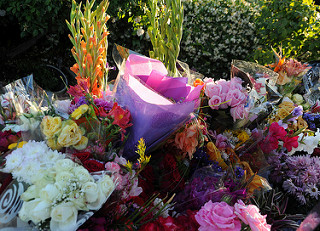

In [10]:
PIL.Image.open(str(roses[3]))

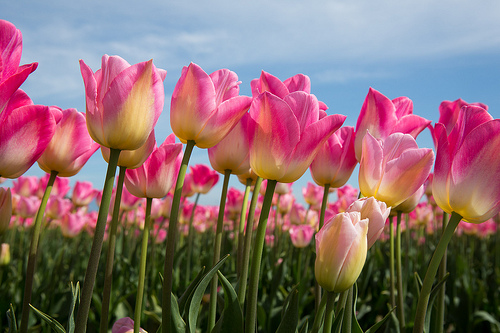

In [16]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [41]:
flowers_images_dict['sunflowers'][:5]

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg')]

In [27]:
#now reading these images into numpy array using cv
#open cv expects a window path. so instead of providing it, 
#we convert it in str

#ip1 = flowers_images_dict['roses'][0]
#op1 = WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

#ip2 = str(flowers_images_dict['roses'][0])
#op2 = 'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [28]:
img.shape

(240, 179, 3)

In [31]:
#resizing images 

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [32]:
#resizing all images in same dimensions

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))                    #img to array
        resized_img = cv2.resize(img,(180,180))         #resize image
        X.append(resized_img)                           #img array in X
        y.append(flowers_labels_dict[flower_name])      #img label in y

In [33]:
#converting list to np array

X = np.array(X)
y = np.array(y)

In [34]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
#scalling the images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [37]:
#Building and training CNN
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)  #here we did not specify activation. so it uses linear
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 55s 563ms/step - loss: 1.3161 - accuracy: 0.4353
Epoch 2/10
86/86 [==============================] - 49s 571ms/step - loss: 0.9920 - accuracy: 0.6010
Epoch 3/10
86/86 [==============================] - 49s 571ms/step - loss: 0.7994 - accuracy: 0.6933
Epoch 4/10
86/86 [==============================] - 49s 571ms/step - loss: 0.5832 - accuracy: 0.7871
Epoch 5/10
86/86 [==============================] - 50s 580ms/step - loss: 0.3796 - accuracy: 0.8688
Epoch 6/10
86/86 [==============================] - 51s 592ms/step - loss: 0.2011 - accuracy: 0.9346
Epoch 7/10
86/86 [==============================] - 50s 583ms/step - loss: 0.1118 - accuracy: 0.9695
Epoch 8/10
86/86 [==============================] - 49s 574ms/step - loss: 0.0730 - accuracy: 0.9786
Epoch 9/10
86/86 [==============================] - 52s 600ms/step - loss: 0.0421 - accuracy: 0.9902
Epoch 10/10
86/86 [==============================] - 50s 581ms/step - loss: 0.0333 - accura

In [38]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 8s 192ms/step - loss: 468.0509 - accuracy: 0.5636


[468.0508728027344, 0.5635775923728943]

In [45]:
#Our model showed high accuracy on training set but
#test accuracy is very low because of overfiting.
#so we will use data augmentation

data_augmented_model = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180,180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

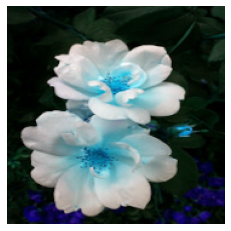

In [47]:
plt.axis('off')
plt.imshow(X[0])

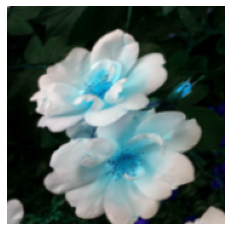

In [49]:
plt.axis('off')
plt.imshow(data_augmented_model(X)[0].numpy().astype("uint8"))

In [52]:
#Training the model again with Data augmentation

num_classes = 5

model = Sequential([
  data_augmented_model,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 81s 645ms/step - loss: 1.4486 - accuracy: 0.3688
Epoch 2/30
86/86 [==============================] - 62s 725ms/step - loss: 1.1429 - accuracy: 0.5142
Epoch 3/30
86/86 [==============================] - 67s 778ms/step - loss: 1.0399 - accuracy: 0.5956
Epoch 4/30
86/86 [==============================] - 68s 793ms/step - loss: 0.9441 - accuracy: 0.6410
Epoch 5/30
86/86 [==============================] - 68s 787ms/step - loss: 0.8786 - accuracy: 0.6664
Epoch 6/30
86/86 [==============================] - 66s 772ms/step - loss: 0.8340 - accuracy: 0.6864
Epoch 7/30
86/86 [==============================] - 68s 786ms/step - loss: 0.7767 - accuracy: 0.7028
Epoch 8/30
86/86 [==============================] - 67s 776ms/step - loss: 0.7586 - accuracy: 0.7155
Epoch 9/30
86/86 [==============================] - 66s 769ms/step - loss: 0.7067 - accuracy: 0.7318
Epoch 10/30
86/86 [==============================] - 66s 768ms/step - loss: 0.6927 - accura

In [54]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 101ms/step - loss: 0.9665 - accuracy: 0.7211


[0.9664915204048157, 0.7211328744888306]